In [2]:
from run import *

import torch
print(torch.__version__)  # 查看 PyTorch 版本
print(torch.version.cuda) # 查看 PyTorch 关联的 CUDA 版本
print(torch.backends.cudnn.version())  # 查看 cuDNN 版本

2.5.0+cu121
12.1
90100


In [3]:
import pickle

li_capam = pickle.load(open('./ouput/licapam.pkl', 'rb'))
capam = pickle.load(open('./ouput/capam_plus.pkl', 'rb'))

In [4]:
li_capam[0]['tasks_done']

99

In [26]:

capam_result = [i['tasks_done'] for i in capam]
li_capam_result = [i['tasks_done'] for i in li_capam]

### 随机生成的结果

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 定义两个目录路径
folder1 = 'ouput/random_result/CapAM'  # 替换为实际路径baseline
folder2 = 'ouput/random_result/LightAM'  # 替换为实际路径new
folder3 = 'ouput/random_result/ImproAM'  # 替换为实际路径new

# 创建字典存储不同模型的数据
model_data = {'50_2': [], '50_3':[], '100_3': [], '100_5': [], '250_7':[], '250_10': [], '500_10': [], '500_20': []}

# 定义一个函数来读取文件夹中的所有.pkl文件
def load_pkl_files(folder, model_label):
    for file_name in os.listdir(folder):
        if file_name.endswith('.pkl'):
                for i in model_data.keys():
                    if i in file_name:
                        file_path = os.path.join(folder, file_name)
                        data = pd.read_pickle(file_path)  # 读取pkl数据
                        data_use = np.array([i['tasks_done'] for i in data]).mean()  # 
                        model_data[i].append((model_label, data_use))

# 读取两个文件夹的pkl文件
load_pkl_files(folder1, 'CapAM')
load_pkl_files(folder2, 'LightAM')
load_pkl_files(folder3, 'ImproAM')

In [9]:
model_data

{'50_2': [('CapAM', np.float64(28.79)),
  ('LightAM', np.float64(23.68)),
  ('ImproAM', np.float64(31.39))],
 '50_3': [('CapAM', np.float64(38.24)),
  ('LightAM', np.float64(31.36)),
  ('ImproAM', np.float64(40.16))],
 '100_3': [('CapAM', np.float64(44.15)),
  ('LightAM', np.float64(37.12)),
  ('ImproAM', np.float64(44.81))],
 '100_5': [('CapAM', np.float64(72.05)),
  ('LightAM', np.float64(58.05)),
  ('ImproAM', np.float64(73.55))],
 '250_7': [('CapAM', np.float64(107.78)),
  ('LightAM', np.float64(86.19)),
  ('ImproAM', np.float64(107.05))],
 '250_10': [('CapAM', np.float64(159.4)),
  ('LightAM', np.float64(121.03)),
  ('ImproAM', np.float64(161.74))],
 '500_10': [('CapAM', np.float64(126.12)),
  ('LightAM', np.float64(126.25)),
  ('ImproAM', np.float64(118.35))],
 '500_20': [('CapAM', np.float64(335.39)),
  ('LightAM', np.float64(253.33)),
  ('ImproAM', np.float64(319.3))]}

### 数据集结果

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 定义两个目录路径
folder1 = 'ouput/dataset_result/CapAM'  # 替换为实际路径baseline
folder2 = 'ouput/dataset_result/LightAM'  # 替换为实际路径new
folder3 = 'ouput/dataset_result/ImproAM'  # 替换为实际路径new

# 创建字典存储不同模型的数据
model_data = {2: [], 3: [], 5: [], 7: []}

# 定义一个函数来读取文件夹中的所有.pkl文件
def load_pkl_files(folder, model_label):
    for file_name in os.listdir(folder):
        if file_name.endswith('.pkl'):
            number = int(file_name.split('_')[1][0])  # 获取文件名中的数字
            file_path = os.path.join(folder, file_name)
            data = pd.read_pickle(file_path)  # 读取pkl数据
            data_use = np.array([i['total_duration'] for i in data]).mean()  # total_duration  # tasks_done
            # 将数据添加到对应模型的列表中
            if number in model_data:
                model_data[number].append((model_label, data_use))  # 添加模型标签

# 读取两个文件夹的pkl文件
load_pkl_files(folder2, 'LightAM')
load_pkl_files(folder1, 'CapAM')
load_pkl_files(folder3, 'ImproAM')

In [16]:
model_data

{2: [('LightAM', np.float64(0.18279790878295898)),
  ('CapAM', np.float64(0.1165330708026886)),
  ('ImproAM', np.float64(0.10626927018165588))],
 3: [('LightAM', np.float64(0.1494128406047821)),
  ('CapAM', np.float64(0.09430605173110962)),
  ('ImproAM', np.float64(0.08395102620124817))],
 5: [('LightAM', np.float64(0.15926599502563477)),
  ('CapAM', np.float64(0.0960845947265625)),
  ('ImproAM', np.float64(0.0858774185180664))],
 7: [('LightAM', np.float64(0.15288856625556946)),
  ('CapAM', np.float64(0.0961574912071228)),
  ('ImproAM', np.float64(0.08474487066268921))]}

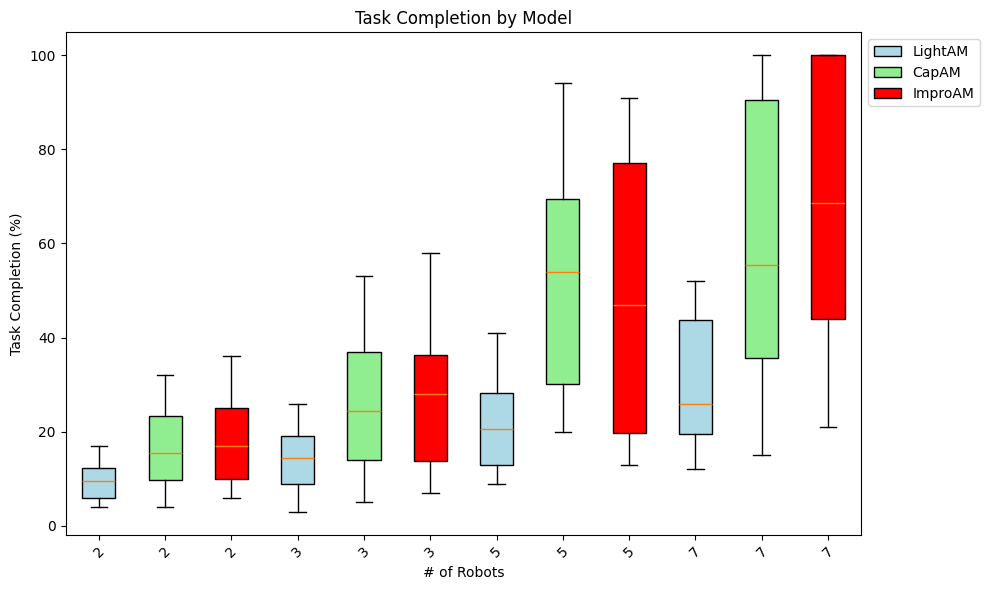

In [7]:

# 准备数据用于箱线图
data_to_plot = []
labels = []

# 整理数据
for number in model_data.keys():
    for model, df in model_data[number]:
        data_to_plot.append(df)  # 替换为您希望绘制的具体列名
        labels.append(f'{number}')  # 设置标签{model} - 

# 设置箱线图填充颜色
plt.figure(figsize=(10, 6))
box = plt.boxplot(data_to_plot, patch_artist=True)

# 设置颜色
colors = ['lightblue', 'lightgreen', 'red']  # 根据需要选择颜色
for i, patch in enumerate(box['boxes']):
    patch.set_facecolor(colors[i % len(colors)])  # 根据模型填充不同颜色

# 设置标签和标题
plt.xticks(range(1, len(labels) + 1), labels, rotation=45)
plt.title('Task Completion by Model')
plt.xlabel('# of Robots')
plt.ylabel('Task Completion (%)')

# 添加图例
plt.legend(["LightAM", "CapAM", "ImproAM"], loc='upper left', bbox_to_anchor=(1, 1))  # 

plt.tight_layout()
plt.show()

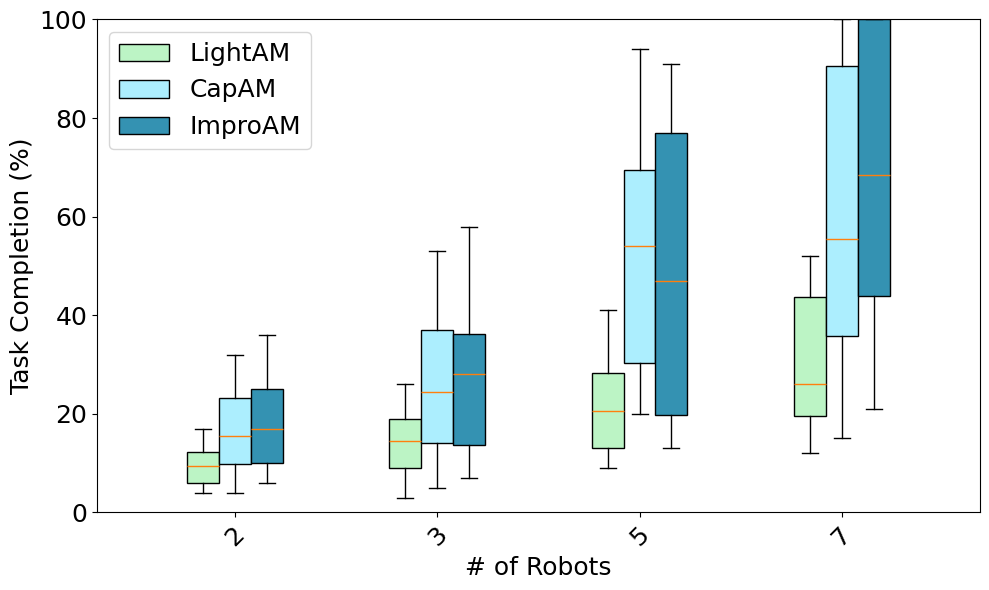

In [ ]:
import numpy as np

# 准备数据用于箱线图
data_to_plot = {key: {model: [] for model, _ in value} for key, value in model_data.items()}

# 整理数据
for number in model_data.keys():
    for model, df in model_data[number]:
        data_to_plot[number][model] = df

# 创建箱线图
plt.figure(figsize=(10, 6))

# 定义颜色
colors = ['#BCF4C5', '#ACEEFE', '#3492B2']  # 对应每个模型的颜色'lightblue', 'lightgreen', 'red'

# 绘制箱线图
positions = []
current_position = 0
offset = 0.15  # 设置偏移量

for number in sorted(data_to_plot.keys()):
    for i, model in enumerate(data_to_plot[number]): 
        plt.boxplot(data_to_plot[number][model], positions=[current_position], patch_artist=True,
                    boxprops=dict(facecolor=colors[i % len(colors)]))
        current_position += offset  # 更新当前绘制位置
    current_position += 0.5  # 增加相同标签组之间的间距

# 设置 x 轴标签
# plt.xticks(np.arange(0, current_position - offset + 0.1, 1), sorted(data_to_plot.keys()), rotation=45)
# plt.title('Task Completion by Model for 100 Tasks')
# 设置 x 轴标签
xticks_positions = np.arange(0.15, current_position, 0.95)  # 使用偏移量生成 x 轴位置
plt.xticks(xticks_positions[:len(data_to_plot)], sorted(data_to_plot.keys()), rotation=45, fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel('# of Robots', fontsize=18)
plt.ylabel('Task Completion (%)', fontsize=18)
plt.ylim(0, 100)  # 设置 y 轴范围
k
# 添加图例
plt.legend(["LightAM", "CapAM", "ImproAM"], fontsize=18)  # , loc='upper left', bbox_to_anchor=(1, 1)
plt.tight_layout()
plt.savefig('results/mrta_results.pdf')
plt.show()

### 消融实验

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 定义两个目录路径
base_folder = 'ouput/Ablation/'  # 替换为实际路径baseline

# 创建字典存储不同模型的数据
model_data = {2: [], 3: [], 5: [], 7: []}

# 定义一个函数来读取文件夹中的所有.pkl文件
def load_pkl_files(folder, model_label):
    for file_name in os.listdir(folder):
        if file_name.endswith('.pkl'):
            number = int(file_name.split('_')[1][0])  # 获取文件名中的数字
            file_path = os.path.join(folder, file_name)
            data = pd.read_pickle(file_path)  # 读取pkl数据
            data_use = np.array([i['tasks_done'] for i in data]).mean()  # total_duration  # tasks_done
            # 将数据添加到对应模型的列表中
            if number in model_data:
                model_data[number].append((model_label, data_use))  # 添加模型标签

for i in ['p1c10', 'p2c10', 'p3c6', 'p3c8', 'p3c10', 'p3c12']:
# 读取两个文件夹的pkl文件
    load_pkl_files(base_folder + i, i)

model_data

{2: [('p1c10', np.float64(22.05)),
  ('p2c10', np.float64(21.86)),
  ('p3c6', np.float64(20.86)),
  ('p3c8', np.float64(23.31)),
  ('p3c10', np.float64(24.49)),
  ('p3c12', np.float64(21.43))],
 3: [('p1c10', np.float64(41.22)),
  ('p2c10', np.float64(40.38)),
  ('p3c6', np.float64(40.67)),
  ('p3c8', np.float64(41.67)),
  ('p3c10', np.float64(41.06)),
  ('p3c12', np.float64(40.28))],
 5: [('p1c10', np.float64(72.56)),
  ('p2c10', np.float64(72.88)),
  ('p3c6', np.float64(73.2)),
  ('p3c8', np.float64(73.09)),
  ('p3c10', np.float64(73.23)),
  ('p3c12', np.float64(73.03))],
 7: [('p1c10', np.float64(89.36)),
  ('p2c10', np.float64(90.19)),
  ('p3c6', np.float64(90.11)),
  ('p3c8', np.float64(90.42)),
  ('p3c10', np.float64(90.07)),
  ('p3c12', np.float64(89.76))]}

In [22]:
# 创建字典存储不同模型的数据
model_data = {2: [], 3: [], 5: [], 7: []}

# 定义一个函数来读取文件夹中的所有.pkl文件
def load_pkl_files(folder, model_label):
    for file_name in os.listdir(folder):
        if file_name.endswith('.pkl'):
            number = int(file_name.split('_')[1][0])  # 获取文件名中的数字
            file_path = os.path.join(folder, file_name)
            data = pd.read_pickle(file_path)  # 读取pkl数据
            data_use = np.array([i['tasks_done'] for i in data]).mean()  # total_duration  # tasks_done
            # 将数据添加到对应模型的列表中
            if number in model_data:
                model_data[number].append((model_label, data_use))  # 添加模型标签

for i in ['p1c6', 'p2c6', 'p3c6', 'p3c8', 'p3c10', 'p3c12']:
# 读取两个文件夹的pkl文件
    load_pkl_files(base_folder + i, i)

model_data

{2: [('p1c6', np.float64(20.86)),
  ('p2c6', np.float64(20.86)),
  ('p3c6', np.float64(20.86)),
  ('p3c8', np.float64(23.31)),
  ('p3c10', np.float64(24.49)),
  ('p3c12', np.float64(21.43))],
 3: [('p1c6', np.float64(40.67)),
  ('p2c6', np.float64(40.67)),
  ('p3c6', np.float64(40.67)),
  ('p3c8', np.float64(41.67)),
  ('p3c10', np.float64(41.06)),
  ('p3c12', np.float64(40.28))],
 5: [('p1c6', np.float64(73.2)),
  ('p2c6', np.float64(73.2)),
  ('p3c6', np.float64(73.2)),
  ('p3c8', np.float64(73.09)),
  ('p3c10', np.float64(73.23)),
  ('p3c12', np.float64(73.03))],
 7: [('p1c6', np.float64(90.11)),
  ('p2c6', np.float64(90.11)),
  ('p3c6', np.float64(90.11)),
  ('p3c8', np.float64(90.42)),
  ('p3c10', np.float64(90.07)),
  ('p3c12', np.float64(89.76))]}